# TP2 - Trabalho 2

14 de novembro de 2022

André Oliveira Barbosa - A91684
Francisco Antonio Borges Paulino - A91666

## Caso de estudo

O objetivo deste problema é modificar as regras do autómato do Conway’s Game of Life da seguinte forma:

1. O espaço de estados é finito definido por uma grelha de células booleanas (morta=0/viva=1) de dimensão $\,N\times N\,$ (com $N>3$) identificadas por índices $\,(i,j)\in \{1..N\}$.  Estas $\;N^2\;$ células são aqui referidas como “normais”. 
2. No estado inicial todas as células normais estão mortas excepto  um quadrado $\,3\times 3\,$, designado por “centro”, aleatoriamente posicionado formado apenas por células vivas.
3. Adicionalmente existem $\,2\,N+1\,$ “células da borda” que correspondem a um dos índices, $i$ ou $j$, ser zero. As células da borda têm valores constantes que, no estado inicial, são gerados aleatoriamente com uma probabilidade $\,\rho\,$ de estarem vivas.
4. As células normais o autómato modificam o estado de acordo com a regra “B3/S23”: i.e. a célula nasce (passa de $0$ a $1$) se tem exatamente 3 vizinhos vivos e sobrevive (mantém-se viva) se o número de vizinhos vivos é 2 ou 3, caso contrário morre ou continua morta.

# Análise do Problema


Procura-se:
   
   1. Construir uma máquina de estados finita que represente este autómato; são parâmetros do problema os parâmetros N,p  e a posição do  “centro”.
   2. Verificar se se conseguem provar as seguintes propriedades:
   a) Todos os estados acessíveis contém pelo menos uma célula viva.
   b) Toda a célula normal está viva pelo menos uma vez em algum estado acessível.

# Inicialização

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from random import randint
import random

# Implementação

### Geração de Matriz bidimensional

In [19]:
Mlinhas = 100

Mcolunas = 100

matriz = np.zeros([Mlinhas, Mcolunas])

### Geração das condições iniciais

In [26]:
np.random.seed(100)


NC_vivas = 9 #quadrado 3x3

# selecionar linhas e colunas aleatoriamente
linha_seeds = np.random.randint(0, matriz.shape[0])
col_seeds = np.random.randint(0, matriz.shape[1])
print(linha_seeds)
print(col_seeds)

l_inicial=linha_seeds
c_inicial=col_seeds
c= NC_vivas
comp_linha=3

#formar o quadrado 3x3 com celulas vivas
while (c):
    if(comp_linha>0):
        matriz[l_inicial,c_inicial] = 1
        l_inicial = l_inicial + 1
        comp_linha= comp_linha - 1
        c=c-1
    else:
        l_inicial=linha_seeds
        c_inicial=c_inicial + 1
        comp_linha = 3

8
24


# Células da Borda

Probabilidade = p = 60%

In [21]:
n_Cborda = 2*100+1 # 2N+1 células da borda
prob_ro=60
ctr=0
while (n_Cborda>0):
    i = random.randint(0, 1)
    if (i==0): 
        j=random.randint(0, matriz.shape[1]-1)
    else:
        j=0
        i=random.randint(0, matriz.shape[1]-1)
    
    if random.randint(0,100) < prob_ro:
        matriz[i,j] = 1
        print("-  ", i,j)
        ctr=ctr+1
    n_Cborda=n_Cborda-1
print("\nNúmero de celulas da borda vivas:", ctr)

-   90 0
-   59 0
-   72 0
-   0 61
-   0 35
-   89 0
-   0 39
-   0 65
-   35 0
-   0 80
-   0 81
-   93 0
-   34 0
-   0 0
-   29 0
-   77 0
-   0 32
-   0 55
-   0 88
-   0 57
-   0 57
-   25 0
-   22 0
-   0 94
-   0 65
-   0 63
-   0 81
-   45 0
-   0 12
-   0 83
-   87 0
-   26 0
-   79 0
-   0 48
-   95 0
-   57 0
-   28 0
-   0 97
-   0 32
-   0 87
-   71 0
-   66 0
-   49 0
-   0 43
-   0 31
-   9 0
-   59 0
-   0 6
-   0 31
-   0 61
-   85 0
-   93 0
-   0 7
-   59 0
-   47 0
-   48 0
-   0 83
-   0 0
-   97 0
-   0 2
-   0 47
-   0 72
-   54 0
-   0 0
-   98 0
-   29 0
-   0 25
-   6 0
-   0 67
-   12 0
-   0 36
-   0 95
-   58 0
-   42 0
-   81 0
-   31 0
-   0 35
-   16 0
-   85 0
-   0 18
-   0 49
-   0 41
-   69 0
-   0 72
-   51 0
-   0 83
-   9 0
-   58 0
-   0 81
-   31 0
-   0 27
-   23 0
-   0 66
-   91 0
-   0 26
-   16 0
-   77 0
-   0 84
-   0 76
-   0 56
-   21 0
-   15 0
-   69 0
-   92 0
-   55 0
-   0 13
-   0 8
-   92 0
-   0 93
-   85 0
-   0 0
-   55 0
-  

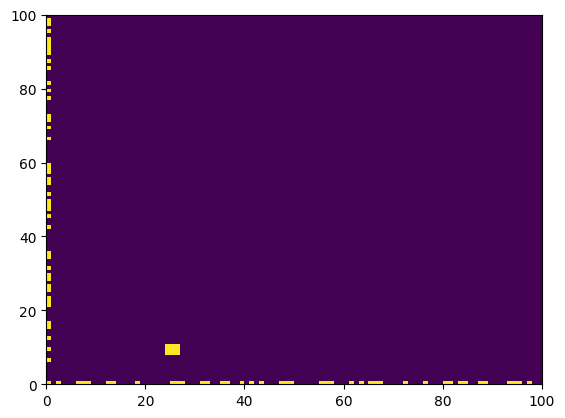

In [22]:
#verificação das condiçoes iniciais
plt.pcolormesh(matriz)
plt.axis('on')
plt.show()

In [23]:
#células vizinhas
viz_linhas = np.array([-1, -1, -1, 0, 0, 1, 1, 1])
viz_cols = np.array([-1, 0, 1, -1, 1, -1, 0, 1])

### Definição das regras

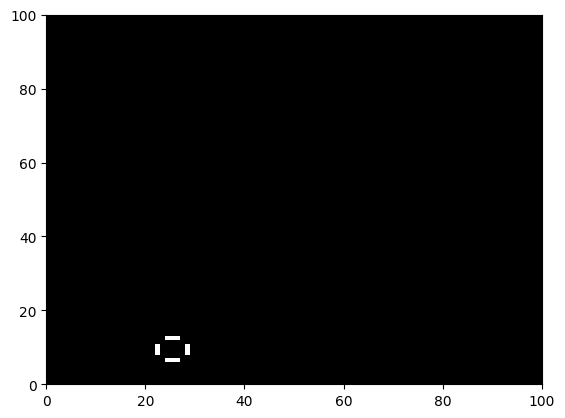

In [24]:
dias = 100


while(dias): #dias>0

    clear_output(wait=True)
    plt.pcolormesh(matriz, cmap='gray')
    plt.show()
   
    M_nova = np.zeros([Mlinhas,Mcolunas]) #guarda os resultados para a geração seguinte
    
    for l in range(1, matriz.shape[0]-1):
        for col in range(1, matriz.shape[1]-1):
            
            #soma dos vizinhos de forma a conseguir verificar a geração seguinte
            soma = matriz[l + viz_linhas, col + viz_cols].sum()
            
            # célula atual vive ou morre?
            if matriz[l,col] == 1:
                
                # menos de 2 vizinhos = morte
                if  soma < 2:
                    M_nova[l,col] = 0
               
                #2 ou 3 vizinhos = vive
                elif soma == 2 or soma == 3:
                    M_nova[l,col] = 1
                    
                #mais de 3 vizinhos= morte
                elif soma > 3:
                    M_nova[l,col] = 0
            else:
                
                # 3 vizinhos torna-se viva
                if soma == 3:
                    M_nova[l,col] = 1
    #diminuir dias no loop
    dias=dias-1
    
    #proxima geração
    matriz = M_nova
    #print(dias)


### Criação do automato de Conway’s Game of Life

##### O autómato:

<img src='automatoEx2.png' width="599" height="599">

In [15]:
from pysmt.shortcuts import *
from pysmt.typing import INT

O estado dos FOTS sera um conjunto de inteiros contendo o valor pc, o segundo o valor da variavel x, o terceiro o valor da variavel y e o quarto do valor da variavel z. O estado inicial é caracterizado pelo seguinte perdicado:

$$ pc=0 \land N=100 \land ρ=60\% \land D=dias \land cl=linha\_seeds \land cc=col\_seeds \land l=1 \land col=1 \land viz\_linhas=[-1, -1, -1, 0, 0, 1, 1, 1] \land viz\_cols=[-1, 0, 1, -1, 1, -1, 0, 1] \land sum=0 \land matriz=[N,N] $$



As transições possiveis no FOTS para o programa em questão são:

$$ (pc = 0 \land pc'= 1 \land N'=N \land ρ'=ρ \land D'=D \land cl'=cl \land cc'=cc \land l'=l \land col'=col \land viz\_linhas'=viz\_linhas \land viz\_cols'=viz\_cols \land sum'=sum \land matriz'=matriz)$$
$$\lor$$
$$ (pc = 1 \land D!=0 \land pc'= 2 \land D'=D \land cl'=cl \land cc'=cc \land l'=l \land col'=col \land viz\_linhas'=viz\_linhas \land viz\_cols'=viz\_cols \land sum'=sum \land matriz'=matriz)$$
$$\lor$$
$$ (pc = 1 \land D=0 \land pc'= 11 \land N'=N \land ρ'=ρ \land D'=D \land cl'=cl \land cc'=cc \land l'=l \land col'=col \land viz\_linhas'=viz\_linhas \land viz\_cols'=viz\_cols \land sum'=sum \land matriz'=matriz)$$
$$\lor$$
$$ (pc = 2 \land pc'= 3 \land D'=D \land cl'=cl \land cc'=cc \land l'=l \land col'=col \land viz\_linhas'=viz\_linhas \land viz\_cols'=viz\_cols \land sum'=sum \land matriz'=matriz)$$
$$\lor$$
$$ (pc = 3 \land pc'=4 \land D'=D \land cl'=cl \land cc'=cc \land l'=l \land col'=col \land viz\_linhas'=viz\_linhas \land viz\_cols'=viz\_cols \land sum'=sum+matriz[l + viz\_linhas, col + viz\_cols] \land matriz'=matriz)$$
$$\lor$$
$$ (pc = 4 \land matriz[l,col]=1 \land pc'=5 \land D'=D \land cl'=cl \land cc'=cc \land l'=l \land col'=col \land viz\_linhas'=viz\_linhas \land viz\_cols'=viz\_cols \land sum'=sum \land matriz'=matriz)$$
$$\lor$$
$$ (pc = 4 \land matriz[l,col]=0 \land pc'=9 \land D'=D \land cl'=cl \land cc'=cc \land l'=l \land col'=col \land viz\_linhas'=viz\_linhas \land viz\_cols'=viz\_cols \land sum'=sum \land matriz'=matriz)$$
$$\lor$$
$$ (pc = 5 \land sum < 2 \land pc'=6 \land D'=D \land cl'=cl \land cc'=cc \land l'=l \land col'=col \land viz\_linhas'=viz\_linhas \land viz\_cols'=viz\_cols \land sum'=sum \land matriz'=matriz[l,col]=0)$$
$$\lor$$
$$ (pc = 5 \land (sum=2 \lor sum =3) \land pc'=7 \land D'=D \land cl'=cl \land cc'=cc \land l'=l \land col'=col \land viz\_linhas'=viz\_linhas \land viz\_cols'=viz\_cols \land sum'=sum \land matriz'=matriz[l,col]=1)$$
$$\lor$$
$$ (pc = 5 \land sum >3 2 \land pc'=8 \land D'=D \land cl'=cl \land cc'=cc \land l'=l \land col'=col \land viz\_linhas'=viz\_linhas \land viz\_cols'=viz\_cols \land sum'=sum \land matriz'=matriz[l,col]=0)$$
$$\lor$$
$$ (pc = 6  \land pc'=2 \land D'=D \land cl'=cl \land cc'=cc \land l'=l+1 \land col'=col+1 \land viz\_linhas'=viz\_linhas \land viz\_cols'=viz\_cols \land sum'=0 \land matriz'=matriz)$$
$$\lor$$
$$ (pc = 7  \land pc'=2 \land D'=D \land cl'=cl \land cc'=cc \land l'=l+1 \land col'=col+1 \land viz\_linhas'=viz\_linhas \land viz\_cols'=viz\_cols \land sum'=0 \land matriz'=matriz)$$
$$\lor$$
$$ (pc = 8  \land pc'=2 \land D'=D \land cl'=cl \land cc'=cc \land l'=l+1 \land col'=col+1 \land viz\_linhas'=viz\_linhas \land viz\_cols'=viz\_cols \land sum'=0 \land matriz'=matriz)$$
$$\lor$$
$$ (pc = 9 \land sum < 3 \land pc'=2 \land D'=D \land cl'=cl \land cc'=cc \land l'=l+1 \land col'=col+1 \land viz\_linhas'=viz\_linhas \land viz\_cols'=viz\_cols \land sum'=0 \land matriz'=matriz)$$
$$\lor$$
$$ (pc = 9 \land sum = 3 \land pc'=10 \land D'=D \land cl'=cl \land cc'=cc \land l'=l \land col'=col \land viz\_linhas'=viz\_linhas \land viz\_cols'=viz\_cols \land sum'=sum \land matriz'=matriz[l,col]=1)$$
$$\lor$$
$$ (pc = 10 \land pc'=2 \land D'=D \land cl'=cl \land cc'=cc \land l'=l+1 \land col'=col+1 \land viz\_linhas'=viz\_linhas \land viz\_cols'=viz\_cols \land sum'=0 \land matriz'=matriz)$$
$$\lor$$
$$ (pc = 2 \land (l > 100 \lor col >100) \land pc'=1 \land D'=D-1 \land cl'=cl \land cc'=cc \land l'=l \land col'=col \land viz\_linhas'=viz\_linhas \land viz\_cols'=viz\_cols \land sum'=sum \land matriz'=matriz)$$
$$\lor$$
$$ (pc = 11  \land pc'= 11 \land N'=N \land ρ'=ρ \land D'=D \land cl'=cl \land cc'=cc \land l'=l \land col'=col \land viz\_linhas'=viz\_linhas \land viz\_cols'=viz\_cols \land sum'=sum \land matriz'=matriz)$$
$$\lor$$

In [16]:
def declare(i):
    state = {}
    state['pc'] = Symbol('pc'+str(i),INT)
    state['N'] = Symbol('N'+str(i),INT)
    state['ρ'] = Symbol('ρ'+str(i),INT)
    state['D'] = Symbol('D'+str(i),INT)
    state['cl'] = Symbol('cl'+str(i),INT)
    state['cc'] = Symbol('cc'+str(i),INT)
    state['l'] = Symbol('l'+str(i),INT)
    state['col'] = Symbol('col'+str(i),INT)
    state['viz_linhas'] = Symbol('viz_linhas'+str(i),INT)
    state['viz_cols'] = Symbol('viz_cols'+str(i),INT)
    state['sum'] = Symbol('sum'+str(i),INT)
    state['matriz'] = Symbol('matriz'+str(i),Array)
    
    return state

In [17]:
def init(state):
    return And(Equals(state['pc'], Int(0)), Equals(state['N'], Int(100)), 
               Equals(state['ρ'], Int(60)), Equals(state['D'], Int(100)),
               Equals(state['cl'], Int(8)),Equals(state['cc'], Int(24)), 
               Equals(state['l'], Int(1)),Equals(state['col'], Int(1)), 
               Equals(state['viz_linhas'], Array([-1, -1, -1, 0, 0, 1, 1, 1])),
               Equals(state['viz_cols'], Array([-1, 0, 1, -1, 1, -1, 0, 1])), Equals(state['sum'], Int(0)),
               Equals(state['matriz'],Array([100,100])))